In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df= pd.read_csv('/content/data2.csv',header= None)

In [ ]:
df.columns = ['Month', 'Value']

In [ ]:
print (df.head())

     Month  Value
0  1964-01   2815
1  1964-02   2672
2  1964-03   2755
3  1964-04   2721
4  1964-05   2946


In [ ]:
df.drop(0, axis=0)

,Month,Value
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946
5,1964-06,3036
...,...,...
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413


In [ ]:
df.isnull().sum()


Month    0
Value    0
dtype: int64

In [ ]:
df.tail()

,Month,Value
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [ ]:
# Check if 'Month' column exists in the DataFrame
print(df.columns)



Index(['Month', 'Value'], dtype='object')


In [ ]:
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Value
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.describe()


,Value
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [ ]:
print(df.dtypes)

Value    int64
dtype: object


In [ ]:
df['Value']=pd.to_numeric(df['Value'])

In [ ]:
print(df.dtypes)

Value    int64
dtype: object


<Axes: xlabel='Month'>

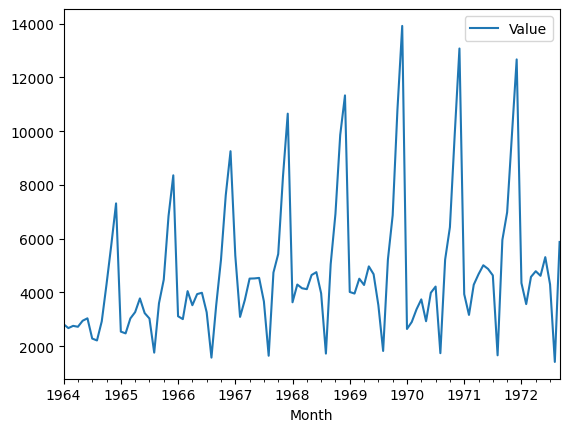

In [ ]:
df.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
  result=adfuller(series)
  if result[1] <= 0.05:
    print("The time series is stationary.",result[1])
  else:
    print("The time series is not stationary.",result[1])

In [ ]:
r1=adfuller(df['Value'])
print(r1)

(-1.8335930563276215, 0.36391577166024586, 11, 93, {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}, 1478.4633060594724)


In [ ]:
adf_test(df['Value'])

The time series is not stationary. 0.36391577166024586


In [ ]:
df['Seasonal First Difference']=df['Value']-df['Value'].shift(12)

In [ ]:
df=df.dropna()
print (df)

            Value  Seasonal First Difference
Month                                       
1965-01-01   2541                     -274.0
1965-02-01   2475                     -197.0
1965-03-01   3031                      276.0
1965-04-01   3266                      545.0
1965-05-01   3776                      830.0
...           ...                        ...
1972-05-01   4618                     -392.0
1972-06-01   5312                      438.0
1972-07-01   4298                     -335.0
1972-08-01   1413                     -246.0
1972-09-01   5877                      -74.0

[93 rows x 2 columns]


In [ ]:
adf_test(df['Seasonal First Difference'])

The time series is stationary. 2.0605796968136632e-11


<Axes: xlabel='Month'>

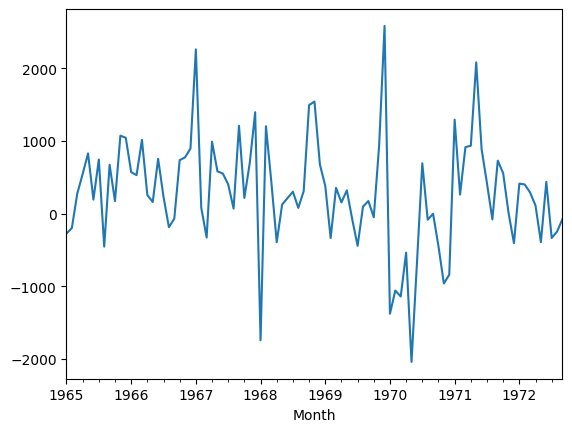

In [ ]:
df['Seasonal First Difference'].plot()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

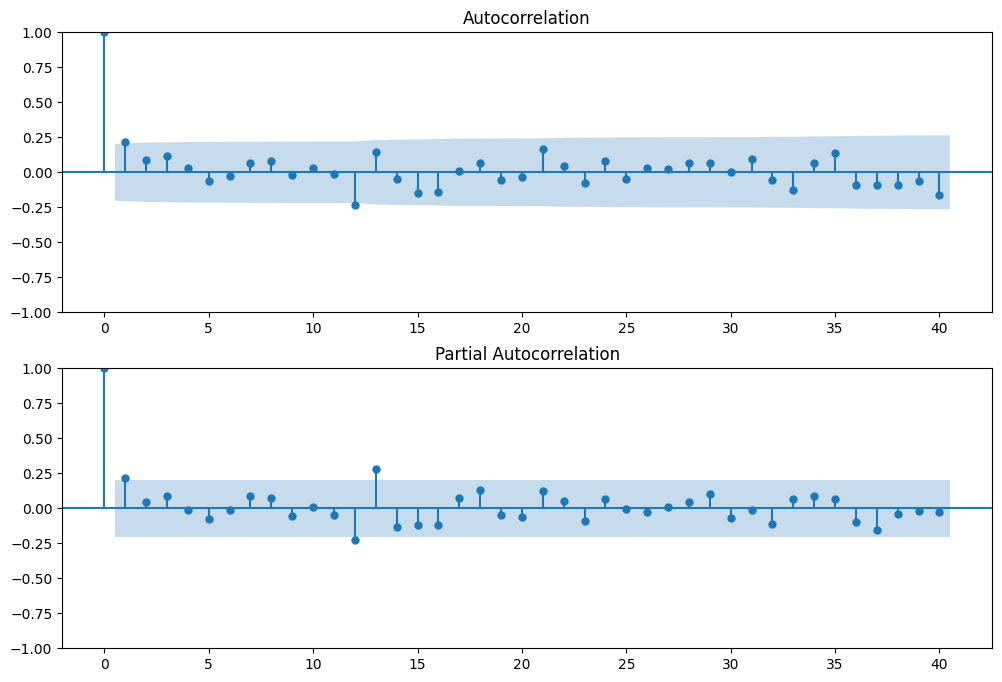

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'],lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(df['Value'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -846.679
Date:                Sun, 07 Jul 2024   AIC                           1699.358
Time:                        14:49:26   BIC                           1706.924
Sample:                    01-01-1965   HQIC                          1702.412
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4711      0.050      9.480      0.000       0.374       0.568
ma.L1         -0.9995      0.133     -7.530      0.000      -1.260      -0.739
sigma2      5.559e+06   2.44e-08   2.27e+14      0.000    5.56e+06    5.56e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.44   Prob(JB):                         0.48
Heteroskedasticity (H):               2.56   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.36e+29. Standard errors may be unstable.
"""

<ipython-input-253-234f68785a1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)


<Axes: xlabel='Month'>

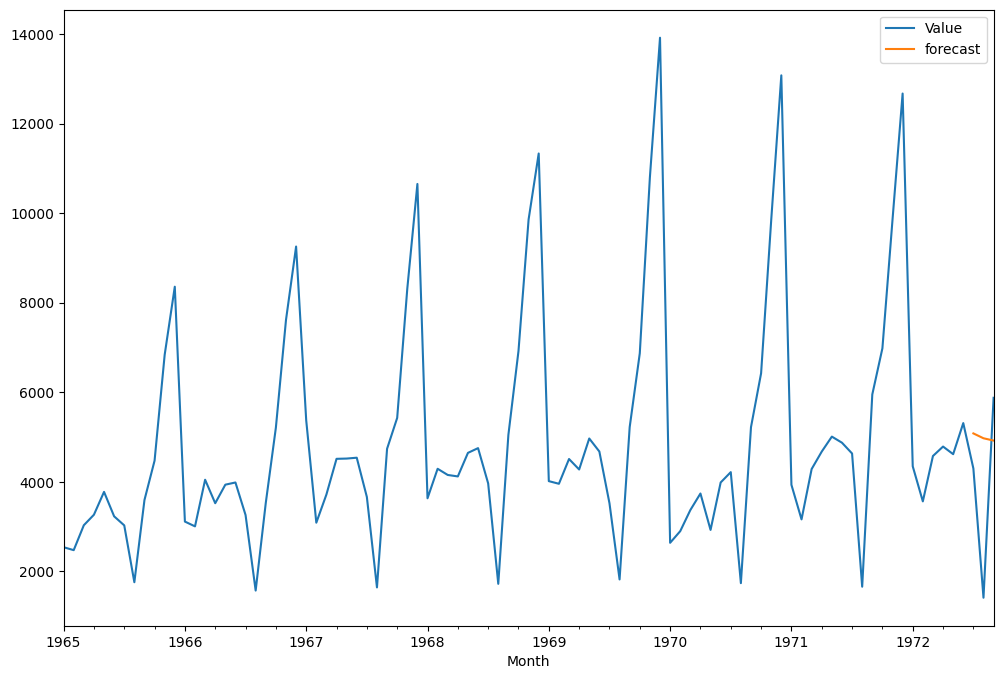

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<ipython-input-256-f06a49a0db8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast']=results.predict(start=80,end=103,dynamic=True)


<Axes: xlabel='Month'>

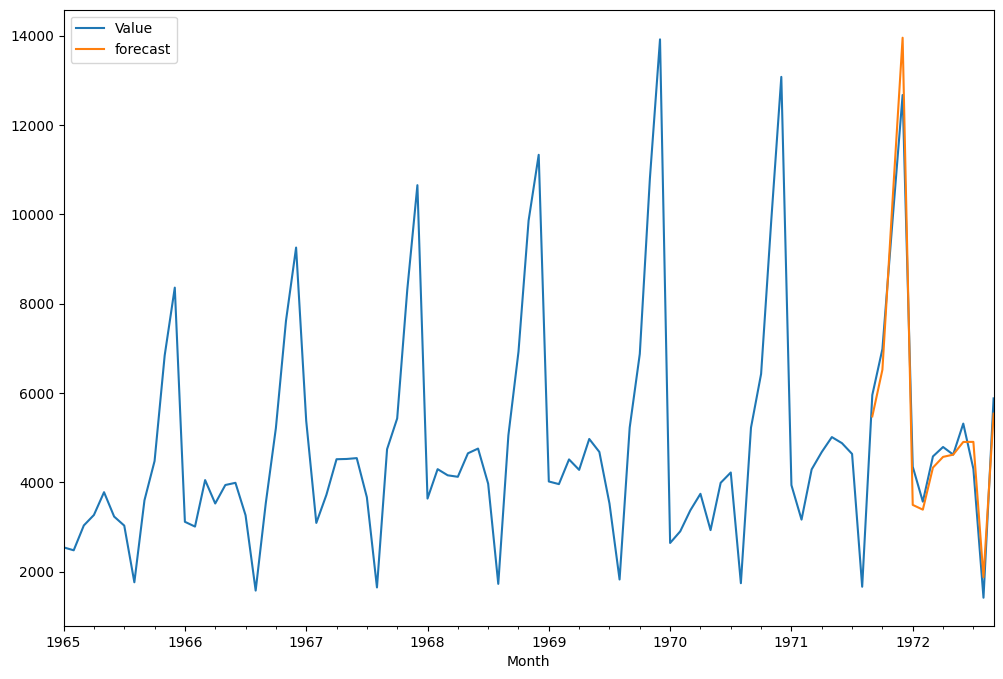

In [ ]:
df['forecast']=results.predict(start=80,end=103,dynamic=True)
df[['Value','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,Value,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

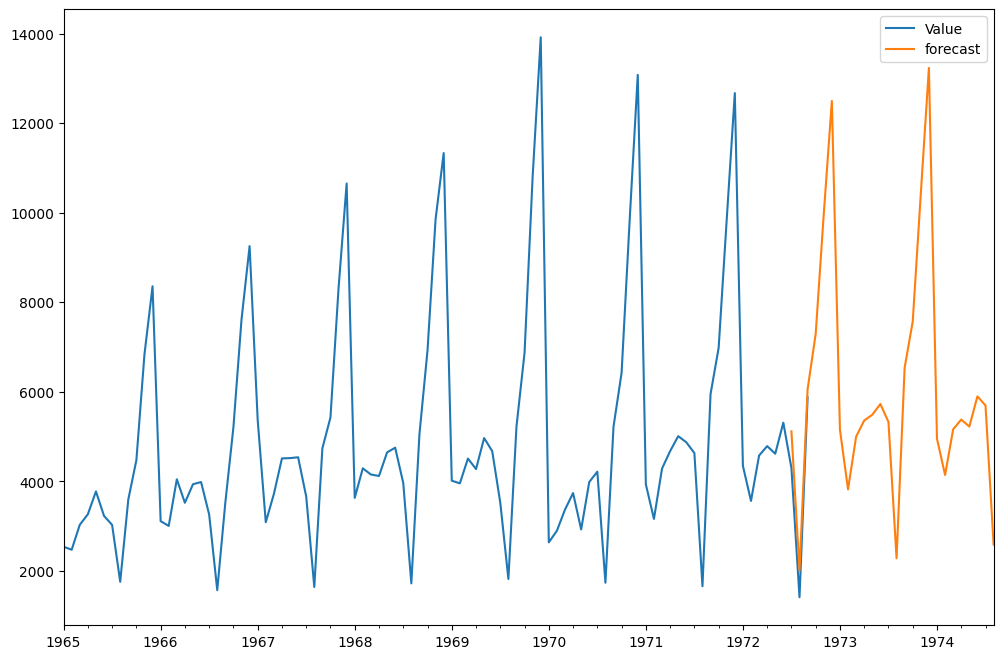

In [ ]:
future_df['forecast'] = results.predict(start = 90, end = 120, dynamic= True)
future_df[['Value', 'forecast']].plot(figsize=(12, 8))

In [ ]:
import prophet as pht

In [ ]:
df= pd.read_csv('/content/data2.csv',header= None)

In [ ]:
print(df)

           0     1
0    1964-01  2815
1    1964-02  2672
2    1964-03  2755
3    1964-04  2721
4    1964-05  2946
..       ...   ...
100  1972-05  4618
101  1972-06  5312
102  1972-07  4298
103  1972-08  1413
104  1972-09  5877

[105 rows x 2 columns]


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.columns = ['ds', 'y']

In [ ]:
df.ds=pd.to_datetime(df.ds)

In [ ]:
model=pht.Prophet()

In [ ]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi8o8u2ex/byoettna.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi8o8u2ex/caex7567.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7462', 'data', 'file=/tmp/tmpi8o8u2ex/byoettna.json', 'init=/tmp/tmpi8o8u2ex/caex7567.json', 'output', 'file=/tmp/tmpi8o8u2ex/prophet_modellbum9b2q/prophet_model-20240707144929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates=model.make_future_dataframe(periods=365)

In [ ]:
prediction =model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1964-01-01,3492.164536,1412.109040,3326.097262,3492.164536,3492.164536,-1126.124393,-1126.124393,-1126.124393,-1126.124393,-1126.124393,-1126.124393,0.0,0.0,0.0,2366.040143
1,1964-02-01,3523.267970,1005.036558,2886.426790,3523.267970,3523.267970,-1596.152144,-1596.152144,-1596.152144,-1596.152144,-1596.152144,-1596.152144,0.0,0.0,0.0,1927.115825
2,1964-03-01,3552.364730,1859.910356,3706.614465,3552.364730,3552.364730,-813.530505,-813.530505,-813.530505,-813.530505,-813.530505,-813.530505,0.0,0.0,0.0,2738.834225
3,1964-04-01,3583.468164,1685.457722,3603.543801,3583.468164,3583.468164,-946.022026,-946.022026,-946.022026,-946.022026,-946.022026,-946.022026,0.0,0.0,0.0,2637.446138
4,1964-05-01,3613.568261,1968.362749,3807.077683,3613.568261,3613.568261,-743.287539,-743.287539,-743.287539,-743.287539,-743.287539,-743.287539,0.0,0.0,0.0,2870.280722


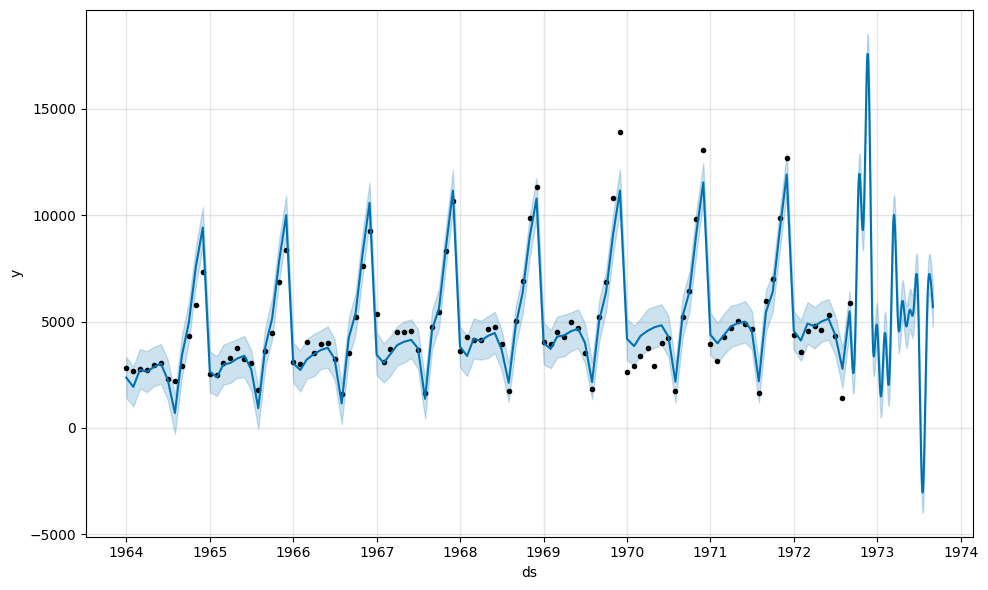

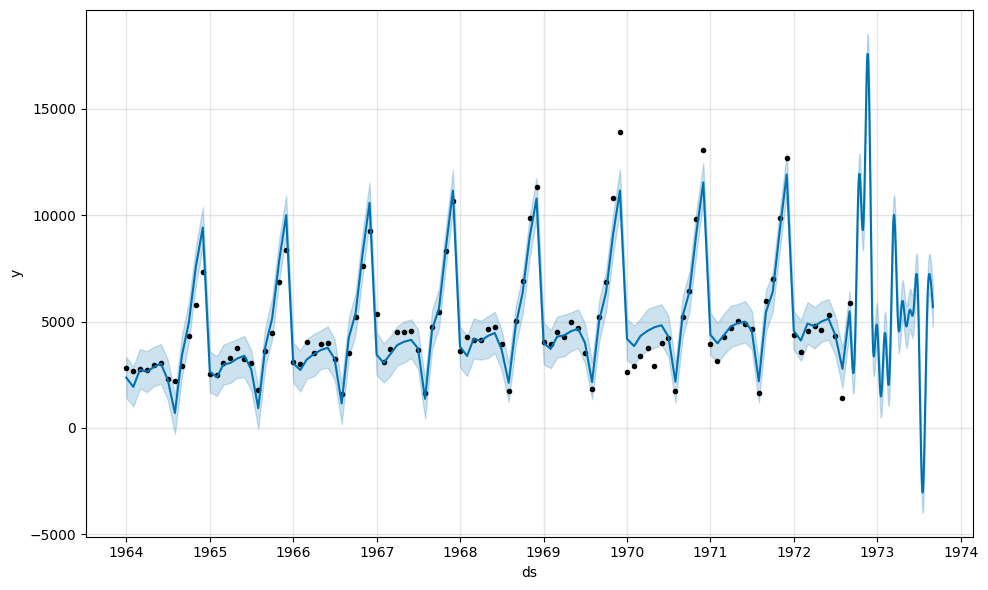

In [ ]:
model.plot(prediction)

In [ ]:
df= pd.read_csv('/data2.csv',header= None)

In [ ]:
df=df.dropna()

In [ ]:
df.columns = ['date', 'value']

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [ ]:
n_steps=10
n_features=1

In [ ]:
TRAIN_SIZE = 0.60

train_size = int(len(df.value) * TRAIN_SIZE)
test_size = len(df.value) - train_size
train, test = df.value[0:train_size], df.value[train_size:len(df)]

In [ ]:
trainy, testy = df.date[0:train_size], df.date[train_size:len(df)]

In [ ]:
train.drop(0,axis=0,inplace=True)

In [ ]:
def create_dataset(data,num):
  x,y=[],[]
  for i in range(num,len(data)):
    x.append(data.iloc[i-num:i])
    y.append(data.iloc[i])
  return np.array(x),np.array(y)

In [ ]:
train_x,train_y=create_dataset(train,n_steps)
test_x,test_y=create_dataset(test,n_steps)

In [ ]:
train_x=train_x.reshape(train_x.shape[0],train_x.shape[1],1)
test_x=test_x.reshape(test_x.shape[0],test_x.shape[1],1)

In [ ]:
train_y

array([ 7312,  2541,  2475,  3031,  3266,  3776,  3230,  3028,  1759,
        3595,  4474,  6838,  8357,  3113,  3006,  4047,  3523,  3937,
        3986,  3260,  1573,  3528,  5211,  7614,  9254,  5375,  3088,
        3718,  4514,  4520,  4539,  3663,  1643,  4739,  5428,  8314,
       10651,  3633,  4292,  4154,  4121,  4647,  4753,  3965,  1723,
        5048,  6922,  9858, 11331,  4016,  3957,  4510])

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model4 = Sequential()
model4.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model4.add(LSTM(50, activation='relu'))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mse')
# fit model
model4.fit(train_x, train_y, epochs=300, verbose=1)

Epoch 1/300
2/2 [==============================] - 3s 33ms/step - loss: 28441750.0000
Epoch 2/300
2/2 [==============================] - 0s 23ms/step - loss: 26435260.0000
Epoch 3/300
2/2 [==============================] - 0s 26ms/step - loss: 26212964.0000
Epoch 4/300
2/2 [==============================] - 0s 25ms/step - loss: 26635944.0000
Epoch 5/300
2/2 [==============================] - 0s 24ms/step - loss: 26869244.0000
Epoch 6/300
2/2 [==============================] - 0s 24ms/step - loss: 26843406.0000
Epoch 7/300
2/2 [==============================] - 0s 21ms/step - loss: 26436330.0000
Epoch 8/300
2/2 [==============================] - 0s 36ms/step - loss: 26382346.0000
Epoch 9/300
2/2 [==============================] - 0s 24ms/step - loss: 26485326.0000
Epoch 10/300
2/2 [==============================] - 0s 24ms/step - loss: 26514166.0000
Epoch 11/300
2/2 [==============================] - 0s 23ms/step - loss: 26104370.0000
Epoch 12/300
2/2 [==============================] - 

In [ ]:
train_y = train_y.astype(np.float32)

In [ ]:
import tensorflow as tf


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
x_input = test.iloc[:n_steps].values
temp_input=list(x_input)
lst_output=[]
i=0
while(i<len(test)):

    if(len(temp_input)>n_steps):
        x_input=temp_input[1:]
        x_input=np.array(x_input)
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model4.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model4.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)

[4609.4365]
1 day input [ 4968.          4677.          3523.          1821.
  5222.          6872.         10803.         13916.
  2639.          4609.43652344]
1 day output [[4907.5693]]
2 day input [ 4677.          3523.          1821.          5222.
  6872.         10803.         13916.          2639.
  4609.43652344  4907.56933594]
2 day output [[5055.0195]]
3 day input [ 3523.          1821.          5222.          6872.
 10803.         13916.          2639.          4609.43652344
  4907.56933594  5055.01953125]
3 day output [[5823.395]]
4 day input [ 1821.          5222.          6872.         10803.
 13916.          2639.          4609.43652344  4907.56933594
  5055.01953125  5823.39501953]
4 day output [[11859.758]]
5 day input [ 5222.          6872.         10803.         13916.
  2639.          4609.43652344  4907.56933594  5055.01953125
  5823.39501953 11859.7578125 ]
5 day output [[5500.2583]]
6 day input [ 6872.         10803.         13916.          2639.
  4609.43652344

In [ ]:
arr = np.arange(0, 62)
arr2= np.arange(63, 105)

In [ ]:
len(lst_output)

42

In [ ]:
len(train)

62

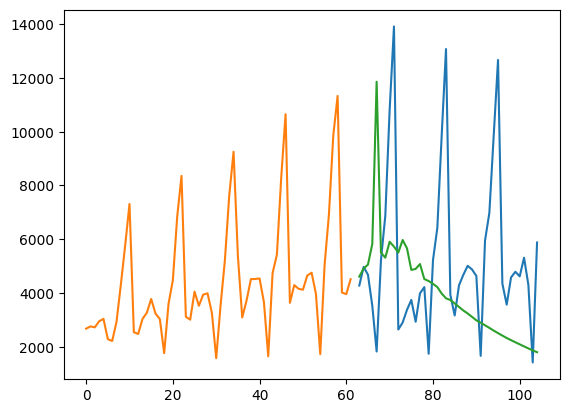

In [ ]:
import matplotlib.pyplot as plt
plt.plot(arr2,test)
plt.plot(arr,train)
plt.plot(arr2,lst_output)




